In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_profiling
import statsmodels.api as sm
from scipy import stats
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas import datetime
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from arch import arch_model
from sklearn.metrics import mean_squared_error

In [15]:
consump_hc = pd.read_csv("C:/Users/arito/Documents/DePaul/DSC672/Daily Aggregated Files/consump_agg_sectors/consump_hc_daily_agg.csv")

In [16]:
consump_hc['Date_Time'] = pd.to_datetime(consump_hc['Date_Time'])
consump_hc_ind = consump_hc.set_index('Date_Time')

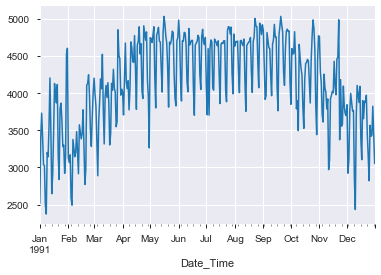

In [17]:
consump_hc_ind['Electricity_KW_AVG'].plot(linewidth=1.5)

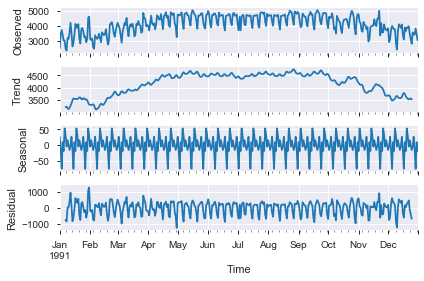

In [18]:
result = seasonal_decompose(consump_hc_ind['Electricity_KW_AVG'], freq=12)
result.plot()
plt.xlabel("Time")
pyplot.show()

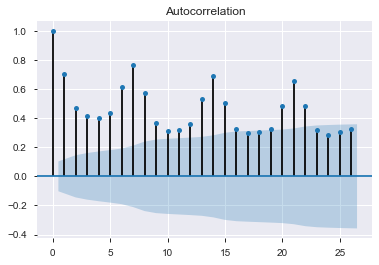

In [19]:
sm.graphics.tsa.plot_acf(consump_hc_ind['Electricity_KW_AVG'].values.squeeze())
plt.show()

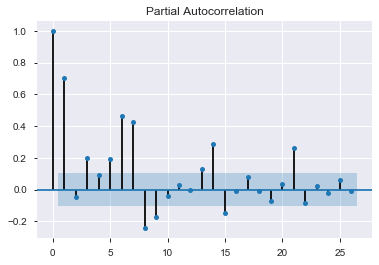

In [20]:
sm.graphics.tsa.plot_pacf(consump_hc_ind['Electricity_KW_AVG'].values.squeeze())
plt.show()

In [22]:
consump_hc_time = consump_hc.iloc[:,0:2]
consump_hc_time.head()

,Date_Time,Electricity_KW_AVG
0,1991-01-01,2514.817742
1,1991-01-02,3407.116061
2,1991-01-03,3731.962783
3,1991-01-04,3412.056525
4,1991-01-05,3039.234804


In [23]:
consump_hc_x = consump_hc.iloc[:,2:]
consump_hc_x.head()

,Weekend,Holiday,School_Day,Solar_Elevation_AVG,Cloud_Cover_Fraction_AVG,Dew_Point_AVG,Precipitable_Water_AVG,Temperature_AVG,Visibility_AVG,Month_2,...,Day_27,Day_31,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Season_Summer,Season_Winter
0,1,1,0,-18.476732,0.950000,-12.883333,5.208333,-9.441667,8.470833,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,-18.411217,0.458333,-14.670833,4.833333,-9.570833,16.100000,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,-18.339779,0.583333,-11.320833,5.583333,-4.670833,16.100000,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,-18.262442,0.862500,-13.825000,5.083333,-10.016667,8.725000,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,-18.179237,0.554167,-20.070833,3.833333,-16.716667,10.675000,0,...,0,0,0,0,0,0,1,0,0,1


In [24]:
train_time = np.array(consump_hc_time.Electricity_KW_AVG[0:292])
test_time = np.array(consump_hc_time.Electricity_KW_AVG[292:])
train_exo = np.array(consump_hc_x[0:292])
test_exo = np.array(consump_hc_x[292:])

In [54]:
model = SARIMAX(train_time, exog=train_exo, order=(1, 0, 0), seasonal_order=(1, 1, 0, 7))

In [55]:
model_fit = model.fit(disp=True)

C:\Users\arito\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [56]:
fc = model_fit.forecast(73, alpha=0.05, exog = pd.DataFrame(test_exo))
fc

array([4496.93106511, 4018.72752172, 3821.93822292, 4409.31776135,
       4768.58927882, 4644.62262779, 4536.99554625, 4569.92931076,
       3811.82577637, 3597.43317916, 4264.73072111, 4658.13896236,
       4772.5038427 , 4475.06363688, 4409.79960739, 3801.78375037,
       3765.60070146, 4267.83746653, 4286.9015    , 4290.30819519,
       4196.58085121, 3706.39504843, 3545.89831323, 3477.80177865,
       4083.83649093, 4270.2428378 , 4260.31374878, 4311.71581088,
       4584.32751802, 4075.84056784, 3882.59235136, 4499.96248974,
       4524.12608912, 4654.52781048, 3927.54206586, 4569.75619334,
       3838.15487186, 3817.99795187, 4338.22484683, 4181.38630499,
       4149.78143079, 4118.26692155, 4332.63380708, 3391.44024742,
       3543.51491405, 3884.61350784, 4244.25367936, 4174.02368433,
       4112.98377357, 4177.07981254, 3307.86628887, 3085.82100948,
       3926.82198758, 4326.8746076 , 4252.6356362 , 4236.55822384,
       4259.25425834, 3737.60531391, 3574.21259371, 4098.56818

In [57]:
actual = pd.DataFrame(test_time)
actual.index = consump_hc_time[292:].index
forecast = pd.DataFrame(fc)
forecast.index = actual.index

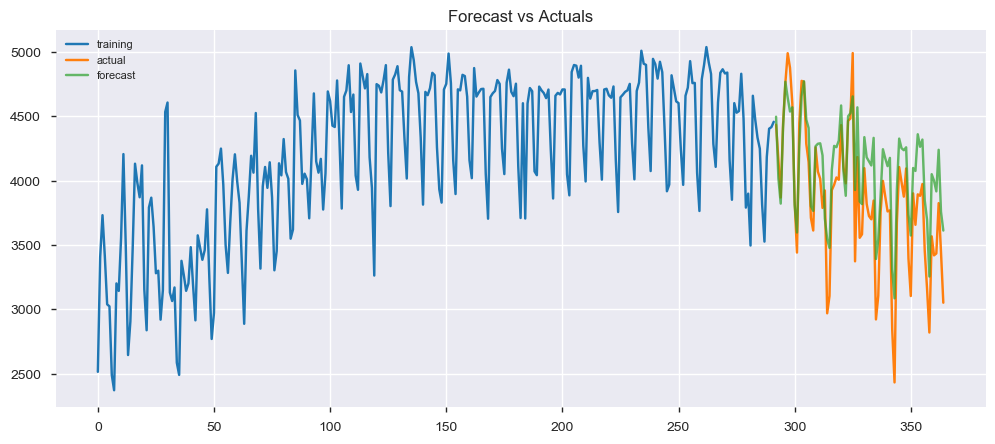

In [58]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_time, label='training')
plt.plot(actual, label='actual')
plt.plot(forecast, label='forecast', alpha = 0.7)
#plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [59]:
mse = mean_squared_error(actual.values, forecast.values)
rmse = np.sqrt(mse)
print(rmse)
from sklearn.metrics import explained_variance_score
r2 = explained_variance_score(actual.values, forecast.values)
print(r2)

330.2985845583183
0.8021553007722526
